In [54]:
import sys
import os
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
sys.path.append(parent_dir)

In [55]:
from functions.import_data_parquet import NFLDataLoader
from functions.data_transformation import prep_schedule_data
from functions.eda import nfl_spread_total_pivot_table
from function_library.py_data_visualizations.basic_data_descriptions import basic_dataframe_description
from function_library.py_data_visualizations.basic_plots import plot_histogram

In [ ]:
nfl_data_loader = NFLDataLoader()
base_df = nfl_data_loader.schedule(seasons = list(range(2014, 2026)))
base_df = prep_schedule_data(base_df)
result_df = base_df.dropna(subset=['away_score', 'home_score'])
future_df = base_df[base_df[['away_score', 'home_score']].isna().all(axis=1)]

In [57]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 3981 to 7138
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              3158 non-null   int64  
 1   week                3158 non-null   int64  
 2   game_id             3158 non-null   object 
 3   gameday             3158 non-null   object 
 4   gametime            3158 non-null   object 
 5   game_type           3158 non-null   object 
 6   neutral_site        3158 non-null   bool   
 7   stadium_id          3158 non-null   object 
 8   stadium             3158 non-null   object 
 9   away_team           3158 non-null   object 
 10  home_team           3158 non-null   object 
 11  away_rest           3158 non-null   int64  
 12  home_rest           3158 non-null   int64  
 13  away_moneyline      3157 non-null   float64
 14  home_moneyline      3157 non-null   float64
 15  away_spread         3158 non-null   float64
 16  hom

In [58]:
basic_dataframe_description(result_df, transpose_description=False)


df Overview:
 Shape: (3158, 38)
 Columns: 38
 Memory: 3.61 MB
 Missing values: 7 total
 Columns with missing values: 7
 Columns with missing values: ['away_moneyline', 'home_moneyline', 'away_spread_odds', 'home_spread_odds', 'under_odds', 'over_odds', 'referee']
  Missing values per column:
    away_moneyline: 1
    home_moneyline: 1
    away_spread_odds: 1
    home_spread_odds: 1
    under_odds: 1
    over_odds: 1
    referee: 1
 Data types: {dtype('O'): 18, dtype('float64'): 14, dtype('int64'): 5, dtype('bool'): 1}


,season,week,away_rest,home_rest,away_moneyline,home_moneyline,away_spread,home_spread,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,away_score,home_score,result,total,overtime
count,3158.000000,3158.000000,3158.000000,3158.000000,3157.000000,3157.000000,3158.000000,3158.000000,3157.000000,3157.000000,3158.000000,3157.000000,3157.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000
mean,2019.360671,9.450285,7.469284,7.469918,65.662338,-117.267659,1.923686,-1.923686,-69.031992,-68.771302,45.373654,-82.863795,-84.692746,0.352122,21.835022,23.827422,1.992400,45.662445,0.056048
std,3.341610,5.407491,2.058114,2.102433,273.521414,303.965724,5.942820,5.942820,82.919135,83.324485,4.305454,67.536441,65.722127,0.477707,9.761733,10.139461,14.288531,13.857780,0.230051
min,2014.000000,1.000000,4.000000,4.000000,-1800.000000,-2540.000000,-18.000000,-22.000000,-134.000000,-133.000000,28.500000,-125.000000,-125.000000,0.000000,0.000000,0.000000,-49.000000,3.000000,0.000000
25%,2016.000000,5.000000,7.000000,7.000000,-149.000000,-260.000000,-3.000000,-6.000000,-110.000000,-110.000000,42.500000,-110.000000,-110.000000,0.000000,15.000000,17.000000,-7.000000,36.000000,0.000000
50%,2019.000000,9.000000,7.000000,7.000000,131.000000,-148.000000,3.000000,-3.000000,-106.000000,-107.000000,45.000000,-107.000000,-107.000000,0.000000,21.000000,24.000000,3.000000,45.000000,0.000000
75%,2022.000000,14.000000,7.000000,7.000000,225.000000,132.000000,6.000000,3.000000,-102.000000,-102.000000,48.000000,-103.000000,-103.000000,1.000000,28.000000,30.000000,10.000000,54.000000,0.000000
max,2025.000000,22.000000,17.000000,16.000000,1454.000000,1000.000000,22.000000,18.000000,120.000000,121.000000,63.500000,113.000000,113.000000,1.000000,59.000000,70.000000,52.000000,105.000000,1.000000


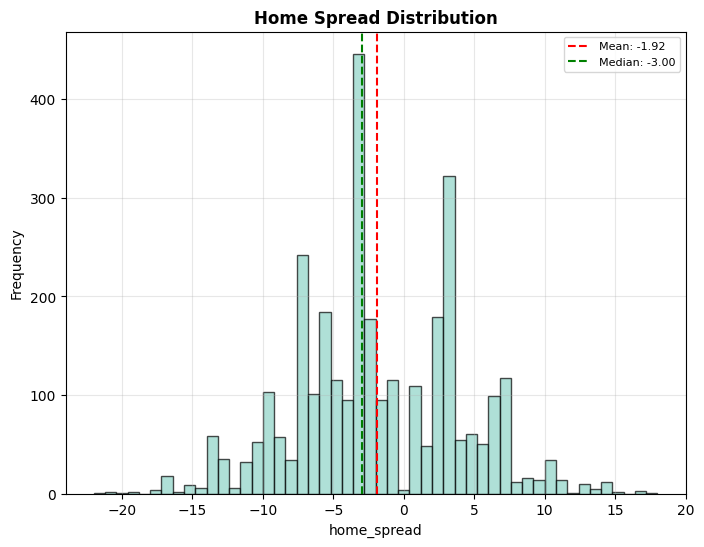

In [59]:
plot_histogram(result_df, 'home_spread', 'Home Spread')

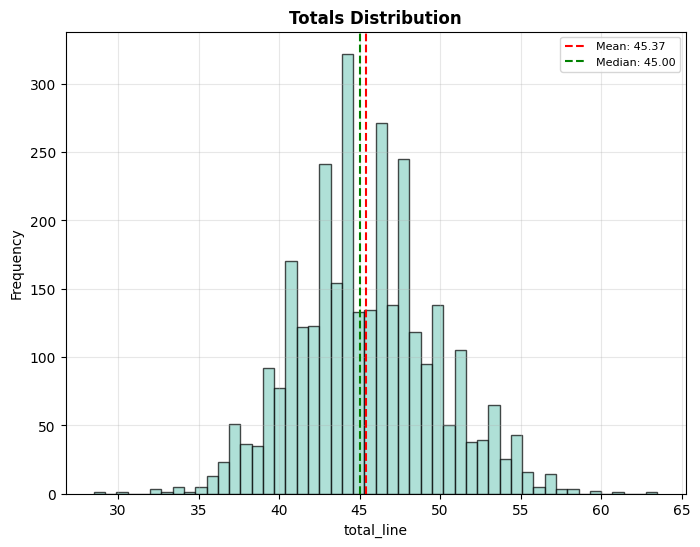

In [60]:
plot_histogram(result_df, 'total_line', 'Totals')

In [61]:
result_df['home_spread_result'].value_counts()

loss    1573
win     1505
push      80
Name: home_spread_result, dtype: int64

In [62]:
result_df['total_result'].value_counts()

under    1607
over     1520
push       31
Name: total_result, dtype: int64

In [63]:
bettor_odds = 0.5
house_odds = 0.524
stake = 1
house_decimal_odds = (1 / house_odds)

In [64]:
df = nfl_spread_total_pivot_table(result_df, 'home_spread', 'home_spread_result', 'spread')
df['ev_payout'] =  (bettor_odds * ((house_decimal_odds - 1) * stake)) - (house_odds * stake)
df

home_spread_result,loss,push,win,All,win_perc,push_perc,ev_payout
home_spread,,,,,,,
-22.0,0,0,1,1,100.0,0.00,-0.069802
-20.5,1,0,1,2,50.0,0.00,-0.069802
-20.0,0,0,1,1,100.0,0.00,-0.069802
-19.5,0,0,1,1,100.0,0.00,-0.069802
-19.0,0,0,1,1,100.0,0.00,-0.069802
...,...,...,...,...,...,...,...
15.5,1,0,0,1,0.0,0.00,-0.069802
16.5,1,0,0,1,0.0,0.00,-0.069802
17.0,1,0,1,2,50.0,0.00,-0.069802


In [66]:
df = nfl_spread_total_pivot_table(result_df, 'total_line', 'total_result', 'total')
df

total_result,over,push,under,All,over_perc,push_perc
total_line,,,,,,
28.5,0,0,1,1,0.00,0.00
30.0,1,0,0,1,100.00,0.00
32.0,0,0,2,2,0.00,0.00
32.5,0,0,1,1,0.00,0.00
33.0,0,0,1,1,0.00,0.00
33.5,2,0,0,2,100.00,0.00
34.0,0,0,3,3,0.00,0.00
34.5,1,0,0,1,100.00,0.00
35.0,2,0,3,5,40.00,0.00


In [67]:
df = nfl_spread_total_pivot_table(result_df, 'home_team', 'home_spread_result', 'spread')
df

home_spread_result,loss,push,win,All,win_perc,push_perc
home_team,,,,,,
ARI,50,1,44,95,46.81,1.05
ATL,56,1,40,97,41.67,1.03
BAL,53,2,45,100,45.92,2.00
BUF,48,3,53,104,52.48,2.88
CAR,49,2,47,98,48.96,2.04
CHI,43,5,47,95,52.22,5.26
CIN,46,6,46,98,50.00,6.12
CLE,51,3,40,94,43.96,3.19
DAL,50,2,47,99,48.45,2.02


In [68]:
df = nfl_spread_total_pivot_table(result_df, 'away_team', 'home_spread_result', 'spread')
df

home_spread_result,loss,push,win,All,win_perc,push_perc
away_team,,,,,,
ARI,54,3,41,98,43.16,3.06
ATL,43,1,53,97,55.21,1.03
BAL,56,4,40,100,41.67,4.00
BUF,50,4,44,98,46.81,4.08
CAR,45,2,51,98,53.12,2.04
CHI,40,4,52,96,56.52,4.17
CIN,61,0,38,99,38.38,0.00
CLE,37,2,59,98,61.46,2.04
DAL,53,2,44,99,45.36,2.02


In [69]:
df = nfl_spread_total_pivot_table(result_df, 'home_team', 'total_result', 'total')
df

total_result,over,push,under,All,over_perc,push_perc
home_team,,,,,,
ARI,48,0,47,95,50.53,0.00
ATL,43,0,54,97,44.33,0.00
BAL,46,1,53,100,46.46,1.00
BUF,56,1,47,104,54.37,0.96
CAR,50,2,46,98,52.08,2.04
CHI,39,0,56,95,41.05,0.00
CIN,54,2,42,98,56.25,2.04
CLE,37,3,54,94,40.66,3.19
DAL,57,1,41,99,58.16,1.01


In [70]:
df = nfl_spread_total_pivot_table(result_df, 'away_team', 'total_result', 'total')
df

total_result,over,push,under,All,over_perc,push_perc
away_team,,,,,,
ARI,46,2,50,98,47.92,2.04
ATL,41,1,55,97,42.71,1.03
BAL,50,0,50,100,50.00,0.00
BUF,40,2,56,98,41.67,2.04
CAR,55,0,43,98,56.12,0.00
CHI,49,0,47,96,51.04,0.00
CIN,38,2,59,99,39.18,2.02
CLE,54,0,44,98,55.10,0.00
DAL,43,1,55,99,43.88,1.01
